In [19]:
import pandas as pd 

df = pd.read_csv('Real_estate_data_no_dupes.csv')
df_houses = df[df['Type'].isin(['Maisons', 'Duplex'])]
df_houses

df_houses.to_csv('houses.csv', index=False)  

,Region,Nature,Type,Description,Price,ModificationDate
16,Berge Du Lac,Location,Duplex,Penthouse avec piscine a,9000,2024-06-03 00:00:00
17,Berge Du Lac,Vente,Duplex,Splendide villa au lac 2,5000000,2024-06-03 00:00:00
22,Berge Du Lac,Location,Maisons,Une villa haut standing,4500,2024-06-03 00:00:00
24,Gammart,Location,Maisons,Villa avec piscine à gam,7000,2024-06-03 00:00:00
36,El Menzah 9,Location,Maisons,Belle villa bureautique,3500,2024-06-03 00:00:00
...,...,...,...,...,...,...
19268,Henchir El Haou,Vente,Maisons,8eme maison de campagne,280000,2024-03-04 00:00:00
19272,Dar Chaabane Pl,Vente,Maisons,77eme maison à dar chaab,190000,2024-03-04 00:00:00
19273,Cap Zbib,Vente,Maisons,Bizerte maison pour les admi,350000,2024-03-04 00:00:00
19278,Beni Khiar,Vente,Maisons,54eme villa inachevée à,380000,2024-03-04 00:00:00


In [22]:
# importing necessary libraries 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# split the df into rent and sell 
df_rent = df_houses[df_houses['Nature'] == 'Location']
df_sell = df_houses[df_houses['Nature'] == 'Vente']


In [61]:
# Removing outliers from df_rent
df_rent = df_rent[(df_rent['Price'] < 20000) & (df_rent['Price'] > 100)]

# Removing outliers from df_sell
df_sell = df_sell[(df_sell['Price'] < 5000000) & (df_sell['Price'] > 10000)]


In [69]:
df_rent.describe()


,Price
count,1409.000000
mean,4099.567779
std,3128.868725
min,131.000000
25%,1500.000000
50%,3500.000000
75%,6000.000000
max,19000.000000


In [68]:
df_sell.describe()

,Price
count,2.313000e+03
mean,8.584498e+05
std,7.699756e+05
min,1.122200e+04
25%,3.200000e+05
50%,6.500000e+05
75%,1.100000e+06
max,4.900000e+06


#### Analysis of  house  prices in Tunisia 

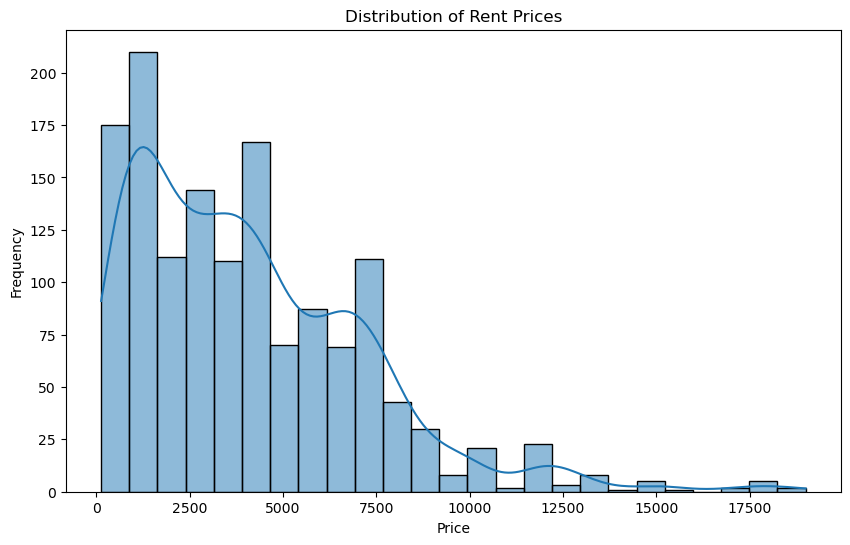

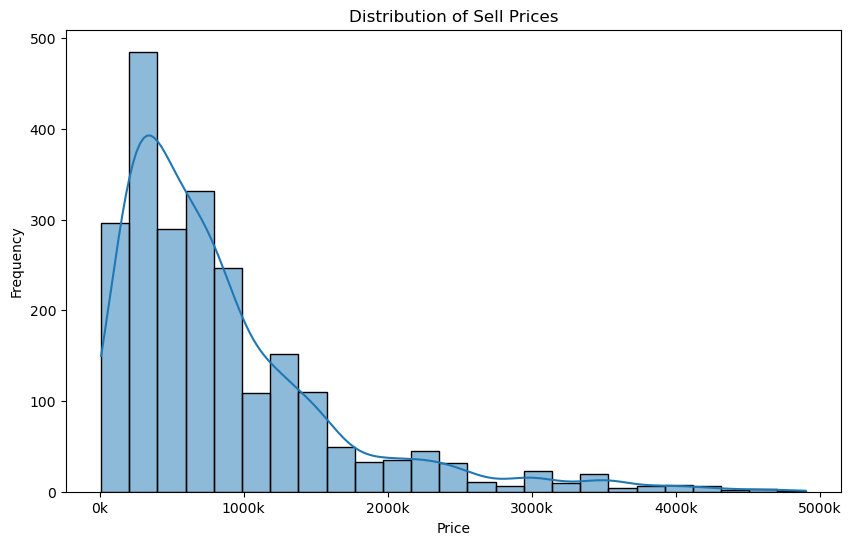

In [71]:
#  Distribution of Prices 
# Rent
plt.figure(figsize=(10, 6))
sns.histplot(df_rent['Price'], kde=True, bins=25)
plt.title('Distribution of Rent Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Sell

from matplotlib.ticker import FuncFormatter

# Define a formatter function to convert large numbers into 'k' format
def thousands_formatter(x, pos):
    return '%1.0fk' % (x * 1e-3)



plt.figure(figsize=(10, 6))
sns.histplot(df_sell['Price'], kde=True, bins=25)
plt.title('Distribution of Sell Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()


In [132]:
df_rent.describe()

,Price,MonthNum
count,1409.000000,1409.000000
mean,4099.567779,4.728176
std,3128.868725,0.878601
min,131.000000,3.000000
25%,1500.000000,4.000000
50%,3500.000000,5.000000
75%,6000.000000,5.000000
max,19000.000000,6.000000


### Price Distribution by Region

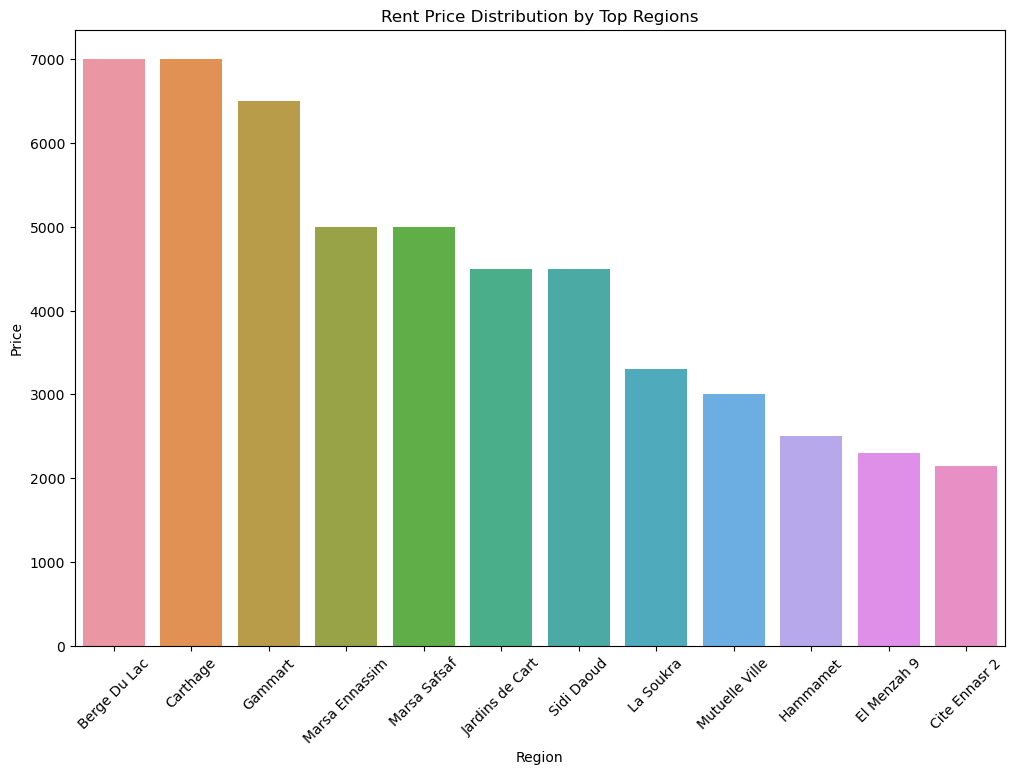

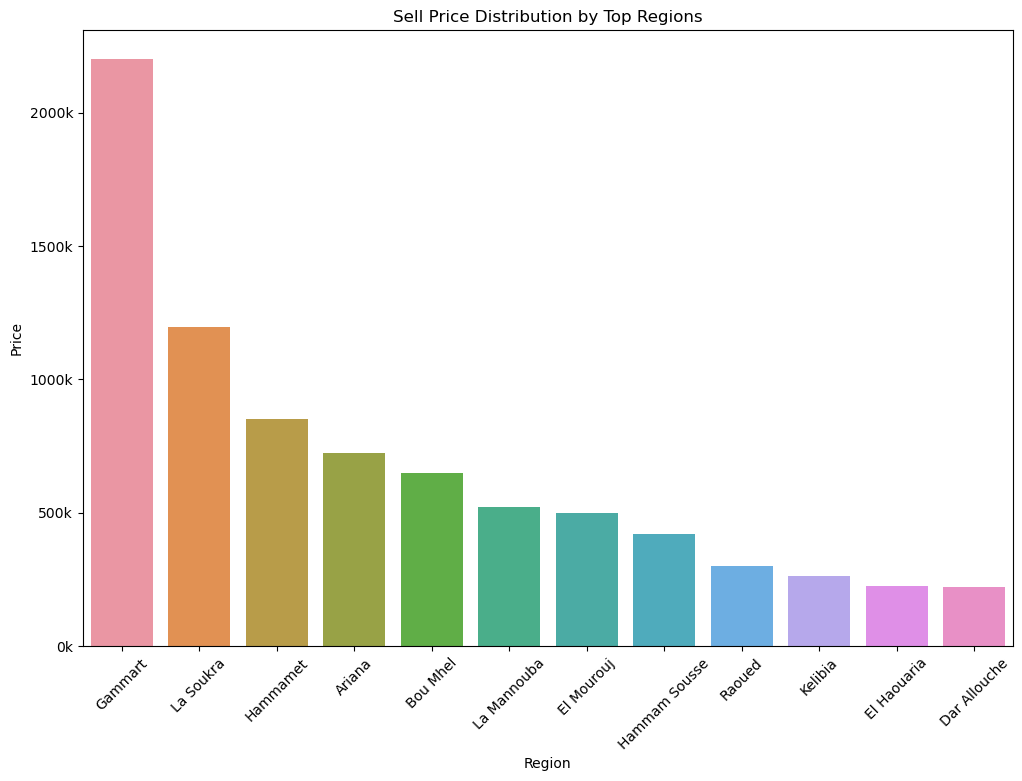

In [94]:

top_n = 12

top_regions_rent = df_rent['Region'].value_counts().nlargest(top_n).index

df_rent_top_regions = df_rent[df_rent['Region'].isin(top_regions_rent)]

# Calculate the median price for each region and sort by it
median_price_rent = df_rent_top_regions.groupby('Region')['Price'].median().sort_values(ascending=False)

# Identify the top N most common regions in the sell dataset
top_regions_sell = df_sell['Region'].value_counts().nlargest(top_n).index

df_sell_top_regions = df_sell[df_sell['Region'].isin(top_regions_sell)]

median_price_sell = df_sell_top_regions.groupby('Region')['Price'].median().sort_values(ascending=False)

# Rent Price Distribution by Top Regions
plt.figure(figsize=(12, 8))
sns.barplot(x=median_price_rent.index, y=median_price_rent.values)
plt.title('Rent Price Distribution by Top Regions')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

# Sell Price Distribution by Top Regions
plt.figure(figsize=(12, 8))
sns.barplot(x=median_price_sell.index, y=median_price_sell.values)
plt.title('Sell Price Distribution by Top Regions')
plt.xlabel('Region')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()

### Price Comparison: Maison vs Duplex

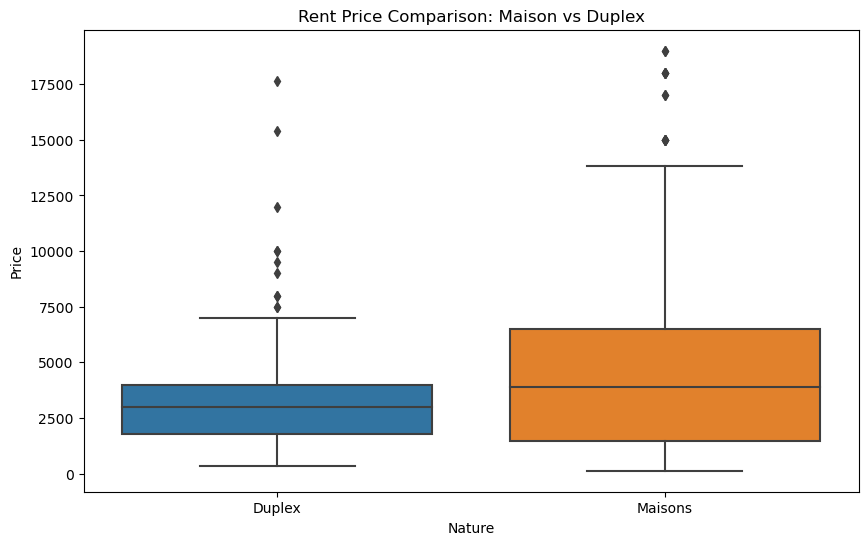

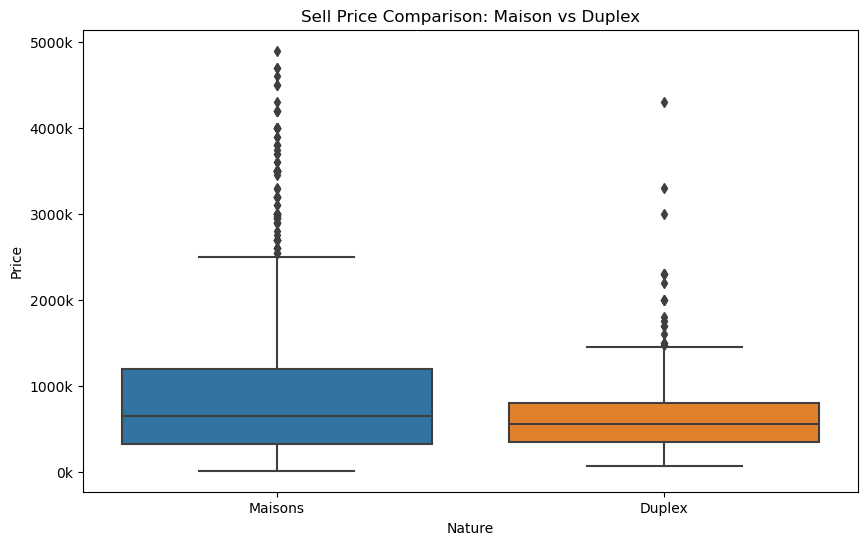

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_rent)
plt.title('Rent Price Comparison: Maison vs Duplex')
plt.xlabel('Nature')
plt.ylabel('Price')
plt.show()

# Sell
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_sell)
plt.title('Sell Price Comparison: Maison vs Duplex')
plt.xlabel('Nature')
plt.ylabel('Price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

plt.show()

### Average Price Over Time

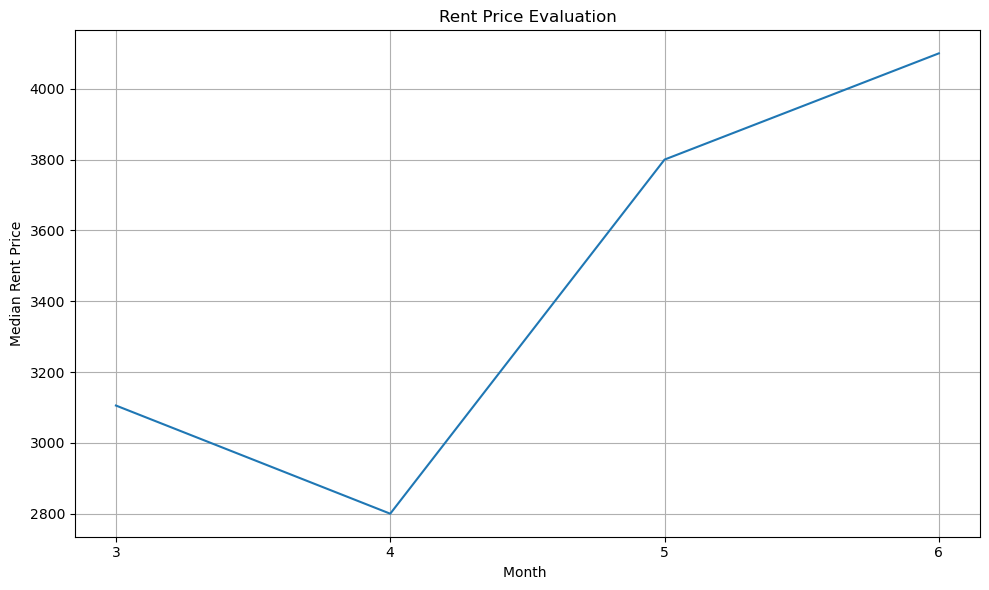

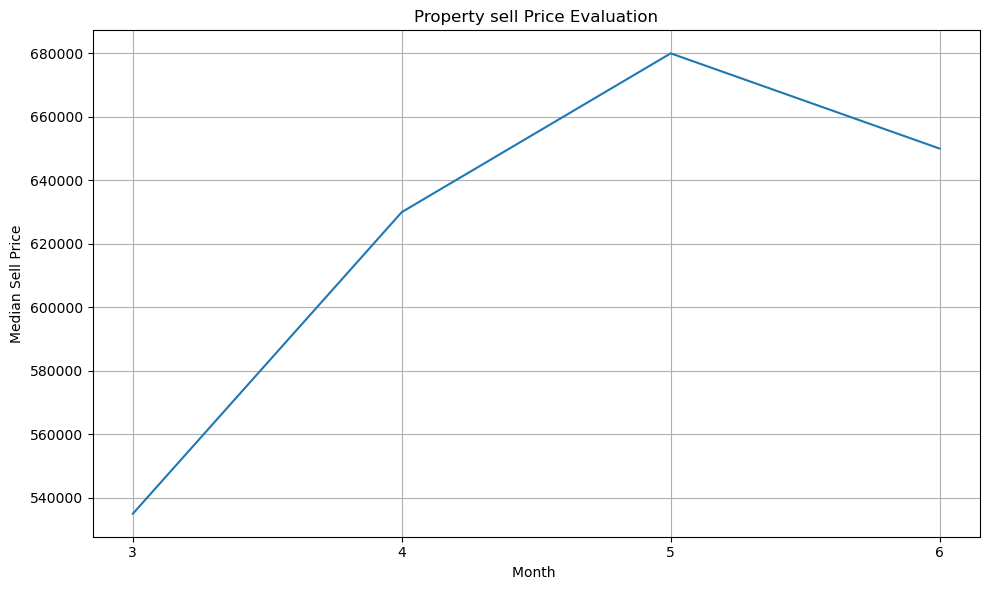

In [129]:

# rent 
df_rent['MonthNum'] = pd.to_datetime(df_rent['ModificationDate']).dt.month

# Group by month number and calculate median rent price
df_rent_month = df_rent.groupby('MonthNum')['Price'].median()

# Sort DataFrame by month number (ascending order)
df_rent_month = df_rent_month.sort_index()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the median rent price for each month (using sorted DataFrame)
plt.plot(df_rent_month)

# Set labels and title
plt.xlabel('Month ')  # Label reflects month number
plt.ylabel('Median Rent Price')
plt.title('Rent Price Evaluation' )

plt.grid(True)
plt.xticks(df_rent_month.index)  # Use month numbers as x-axis ticks
plt.tight_layout()

plt.show()


# sell 
df_sell['MonthNum'] = pd.to_datetime(df_sell['ModificationDate']).dt.month

# Group by month number and calculate median rent price
df_sell_month = df_sell.groupby('MonthNum')['Price'].median()

# Sort DataFrame by month number (ascending order)
df_sell_month = df_sell_month.sort_index()

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

# Plot the median rent price for each month (using sorted DataFrame)
plt.plot(df_sell_month)

# Set labels and title
plt.xlabel('Month ')  # Label reflects month number
plt.ylabel('Median Sell Price')
plt.title('Property sell Price Evaluation' )

plt.grid(True)
plt.xticks(df_rent_month.index)  # Use month numbers as x-axis ticks
plt.tight_layout()

plt.show()
